# Programming for Data Science and Artificial Intelligence

## Case Study - Life Expectancy

This data is a **regression problem**, trying to predict life expectancy.

- **Country**
- **Year**
- **Status**: Developed or Developing status
- **Life expectancy**: Life Expectancy in age
- **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **Infant deaths**: Number of Infant Deaths per 1000 population
- **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **Percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- **Measles**: - number of reported cases per 1000 population
- **BMI** Average Body Mass Index of entire population
- **under-five deaths**: Number of under-five deaths per 1000 population
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
- **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- **HIV/AIDS**: Deaths per 1000 live births HIV/AIDS (0-4 years)
- **GDP**: Gross Domestic Product per capita (in USD)
- **Population**: Population of the country
- **thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- **thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)
- **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling**: Number of years of Schooling(years)

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Import data

In [2]:
df = pd.read_csv('data/Life_Expectancy_Data.csv')

In [3]:
# print the first rows of data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Check the shape of your data
df.shape

(2938, 22)

In [5]:
# Statistical info Hint: look up .describe()
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Datatypes of Attributes

In [6]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Column names

In [7]:
# Check the column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 2. Cleaning

### Renaming

Now we would like to rename some of the following column names

In [8]:
# rename columns
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

In [9]:
# Notice that the column names changed
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

### Check for null values

In [10]:
df.isna().sum()

country                0
year                   0
status                 0
life-exp              10
adult-mort            10
infant-deaths          0
alcohol              194
per-exp                0
hepa                 553
measles                0
bmi                   34
under-five-deaths      0
polio                 19
total-exp            226
dip                   19
hiv                    0
gdp                  448
pop                  652
thin1-19              34
thin5-9               34
income               167
school               163
dtype: int64

### Let's fill these null values
To do so, there are many methods e.g. fill with mode, fill with median and fill with mean

#how to deal with missing/null values

#numeric
- replace with 0 (when 0 makes sense)
- replace with mean (when your data is quite normal)
- replace with median (if your data is not so normal)
- replace with predicted values from regression

#categorical
- replace with 'Undedined', "No Category" (when you don't have a good way)
- replace with the ratio (this is good, if you think the distribution is an important factor)
    - example: ratio of developing/developed is 7/3, 7/3 is kept
- replace with the mode (most frequent elements) -> this will make sense when there is some majority

In [11]:
#define two lists, one for median and one for mean
fill_mean = ['bmi']

col_with_missing_value= df.columns[df.isna().any()]
fill_median = set(col_with_missing_value) - set(fill_mean)

In [12]:
#let's fill now!
for col in fill_mean:
    df[col].fillna(df[col].mean(), inplace=True)
    
#let's fill now!
for col in fill_median:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
#check again
df.isna().sum()

country              0
year                 0
status               0
life-exp             0
adult-mort           0
infant-deaths        0
alcohol              0
per-exp              0
hepa                 0
measles              0
bmi                  0
under-five-deaths    0
polio                0
total-exp            0
dip                  0
hiv                  0
gdp                  0
pop                  0
thin1-19             0
thin5-9              0
income               0
school               0
dtype: int64

### Checking Outliers

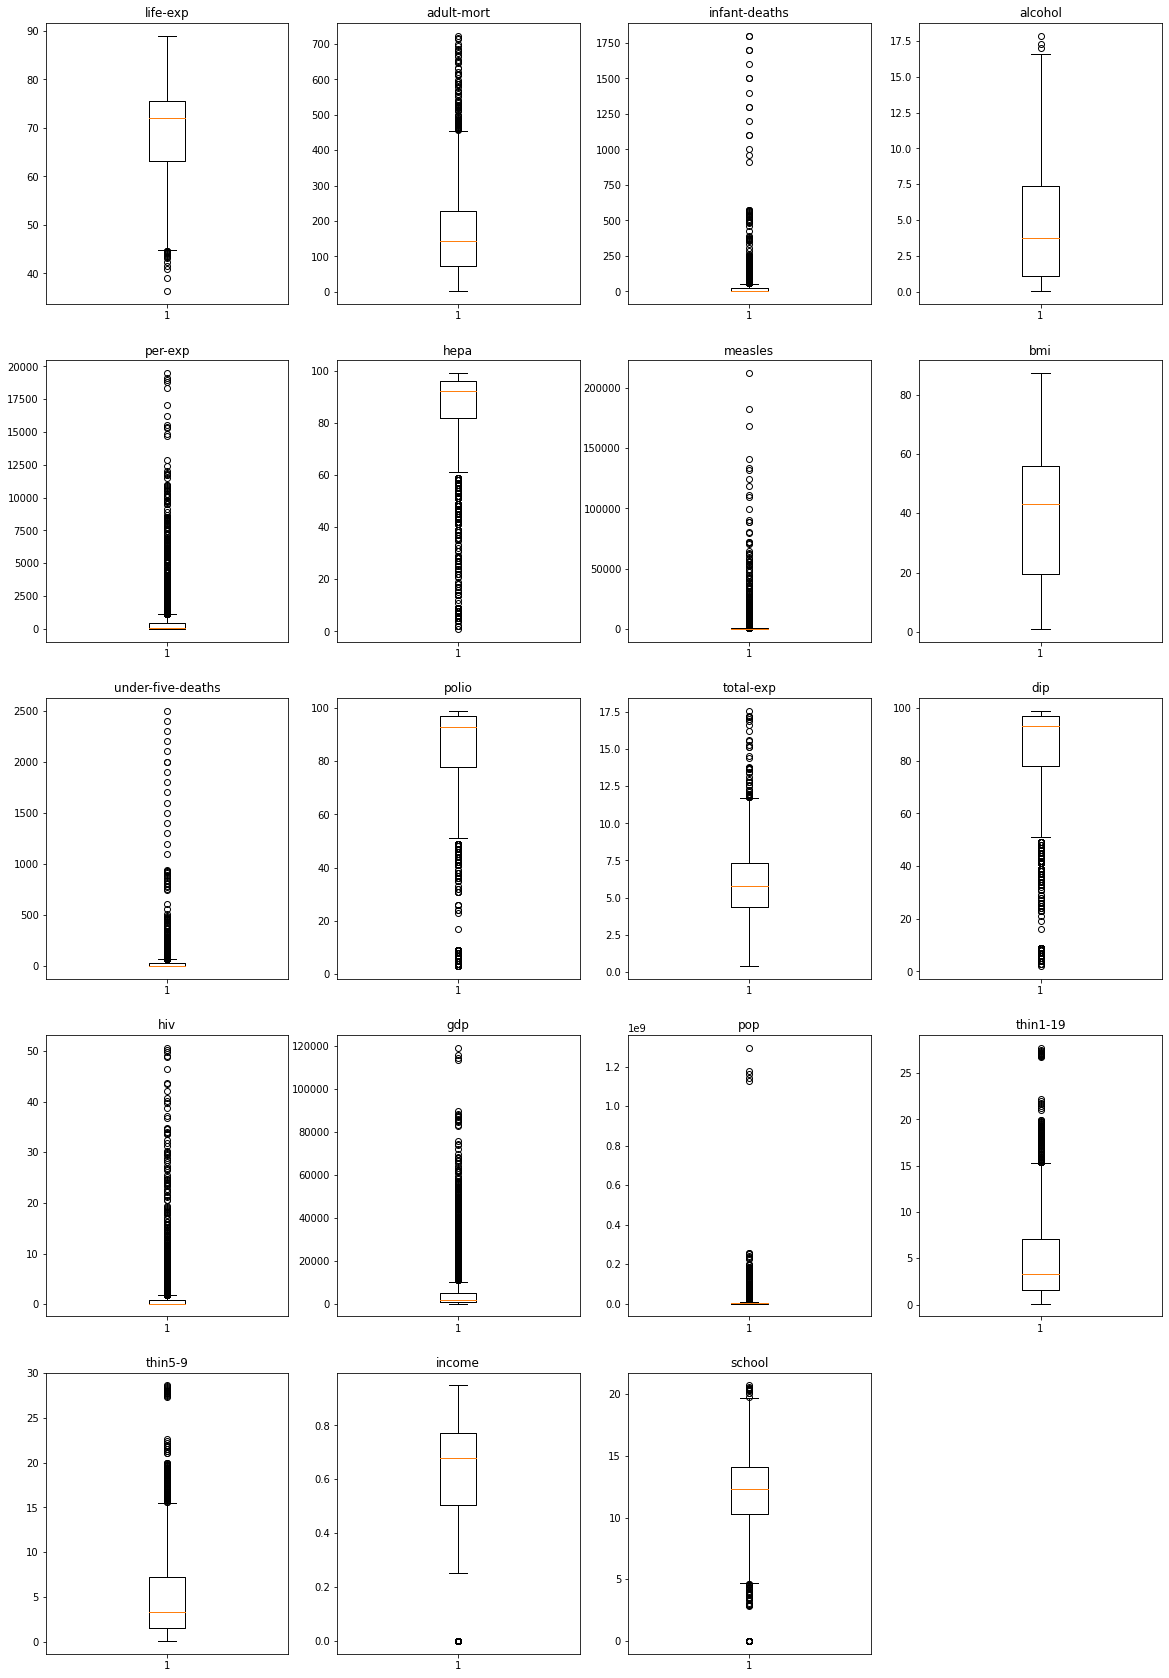

In [14]:
# Create a dictionary of columns.
col_dict = {'life-exp':1,'adult-mort':2,'infant-deaths':3,'alcohol':4,'per-exp':5,
            'hepa':6,'measles':7,'bmi':8,'under-five-deaths':9,'polio':10,'total-exp':11,'dip':12,
            'hiv':13,'gdp':14,'pop':15,'thin1-19':16,'thin5-9':17,'income':18,'school':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

In [15]:
#find categorial and numerical column so we can plot stuffs easily
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(exclude= ['object'])

In [16]:
#categorical

In [17]:
#numerical

In [18]:
#common ways to deal with outliers

# Write a function to count and calculate the percentage of the outliers, 
# calculate the 25%, 75% and inter quatile 
# so that you can find the min and max values
# and so that you can "count" how many values that are less than min value or more than max values
# and so that you can calculate the percentage of the outlier
def outlier_count(col, data = df):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [19]:
for col in numerical.columns:
    outlier_count(col)


---------------life-exp---------------

Number of outliers: 17
Percent of data that is outlier: 0.58%

---------------adult-mort---------------

Number of outliers: 86
Percent of data that is outlier: 2.93%

---------------infant-deaths---------------

Number of outliers: 315
Percent of data that is outlier: 10.72%

---------------alcohol---------------

Number of outliers: 3
Percent of data that is outlier: 0.1%

---------------per-exp---------------

Number of outliers: 389
Percent of data that is outlier: 13.24%

---------------hepa---------------

Number of outliers: 322
Percent of data that is outlier: 10.96%

---------------measles---------------

Number of outliers: 542
Percent of data that is outlier: 18.45%

---------------under-five-deaths---------------

Number of outliers: 394
Percent of data that is outlier: 13.41%

---------------polio---------------

Number of outliers: 279
Percent of data that is outlier: 9.5%

---------------total-exp---------------

Number of outlier

### Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])

df["status"].unique()

array([1, 0])

In [21]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Developed', 'Developing'], dtype=object)

In [22]:
# then we can try transform
le.transform(["Developed", "Developing"])

array([0, 1])

## 3. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

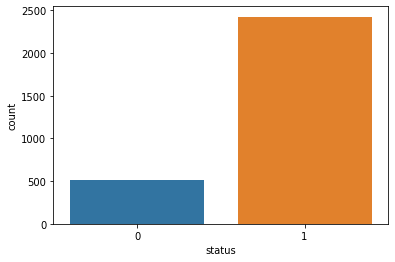

In [23]:
# Let's see how many developing and developed countries there are
sns.countplot(df['status']);

### Categorical

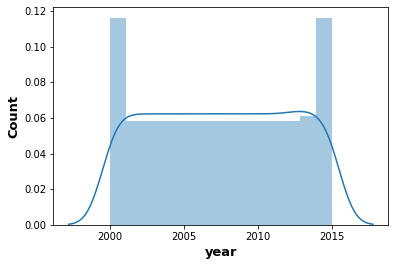

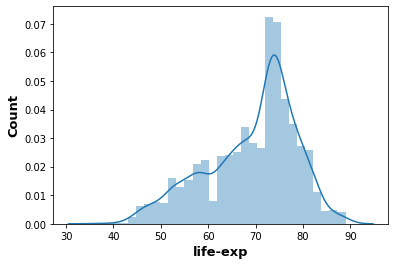

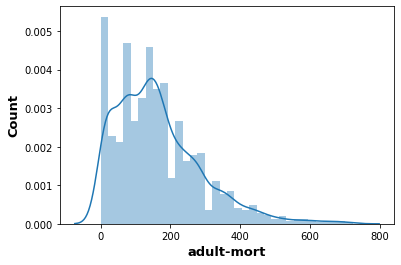

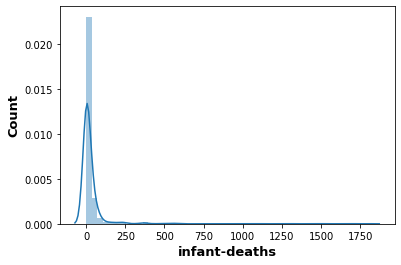

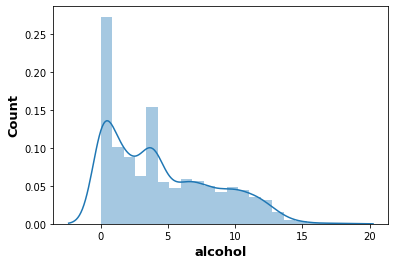

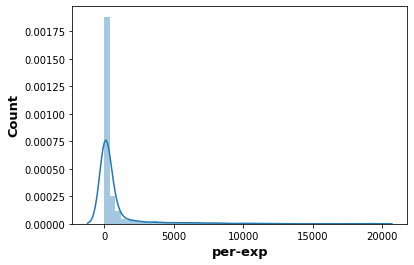

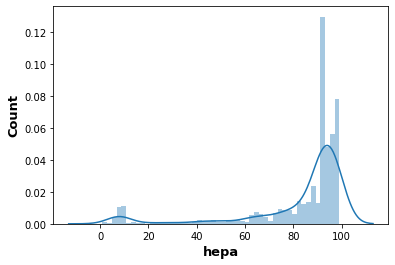

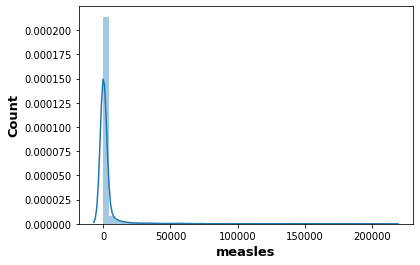

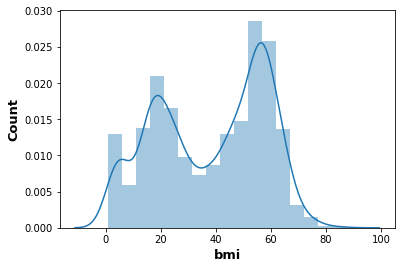

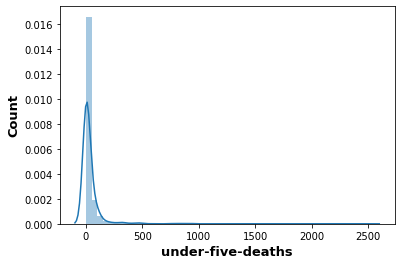

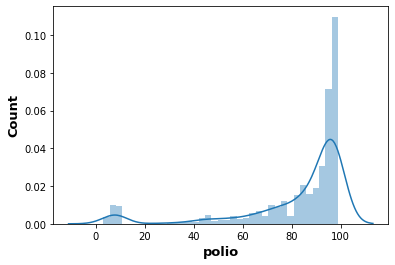

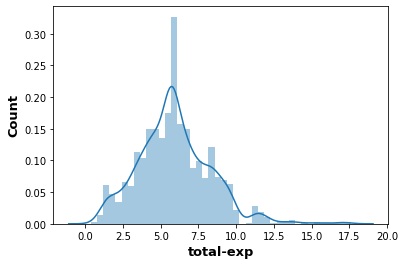

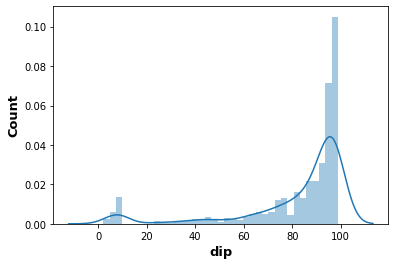

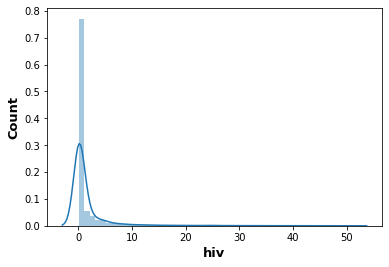

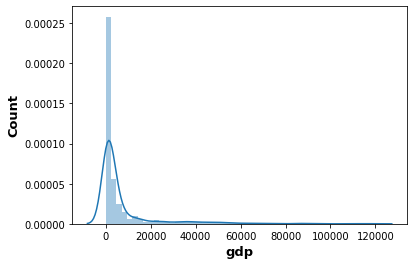

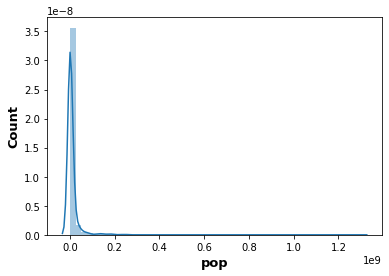

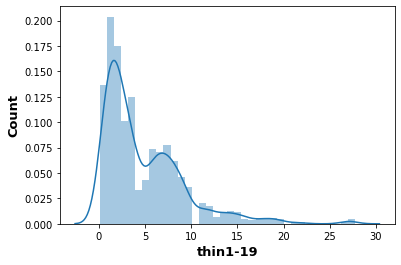

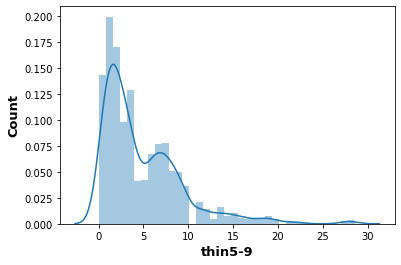

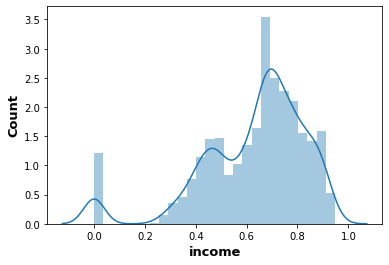

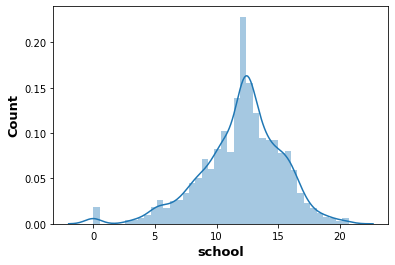

In [24]:
# Let's plot all columns with numberical data using displot
for col in numerical.columns:
    sns.distplot(numerical[col]); 
    plt.ylabel("Count", fontsize= 13, fontweight="bold")
    plt.xlabel(col, fontsize=13, fontweight="bold")
    plt.show()

Text(0.5, 0, 'Status')

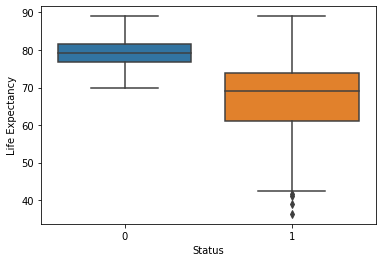

In [25]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["status"], y = df["life-exp"]);
plt.ylabel("Life Expectancy")
plt.xlabel("Status")

### Numerical

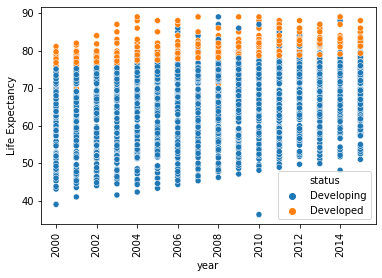

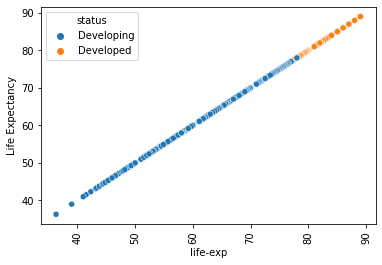

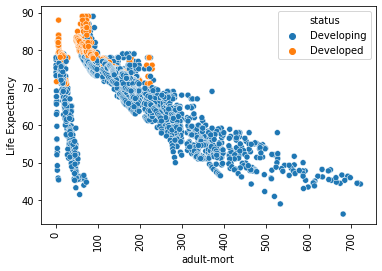

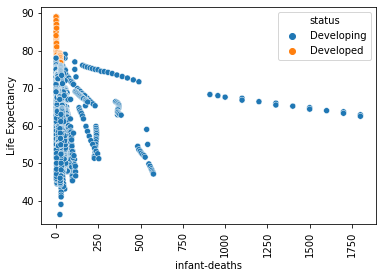

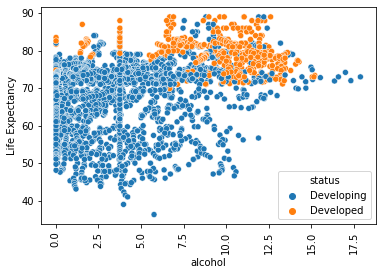

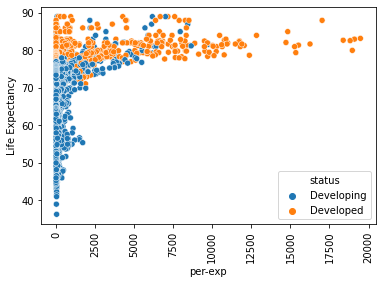

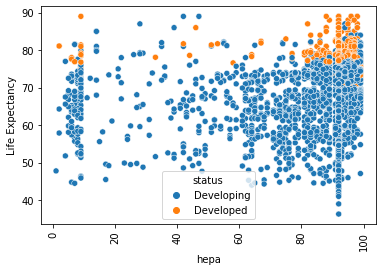

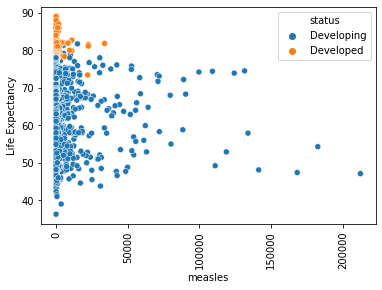

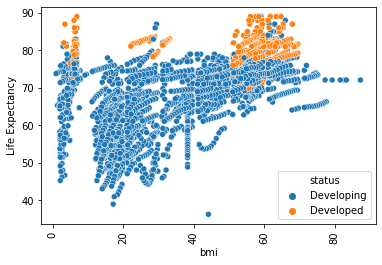

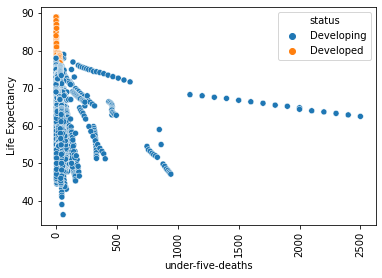

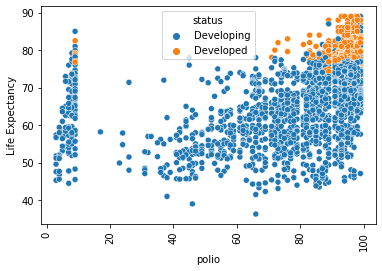

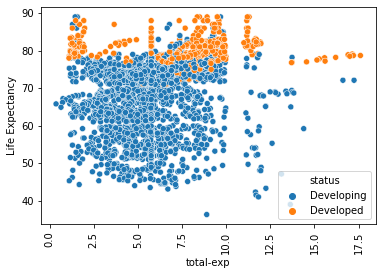

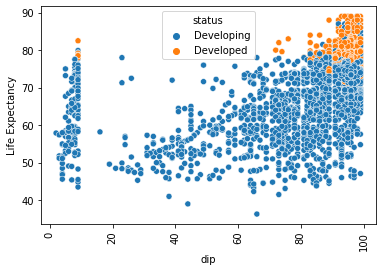

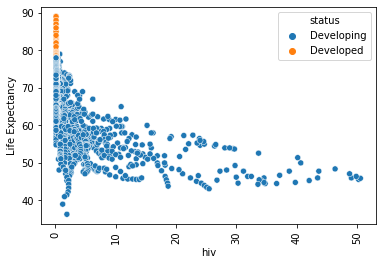

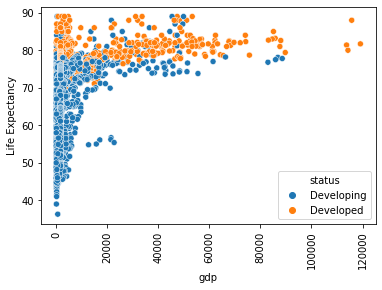

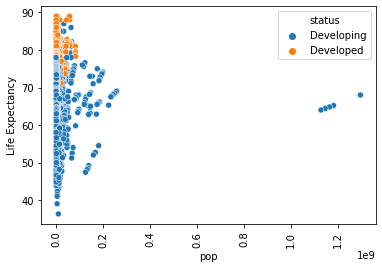

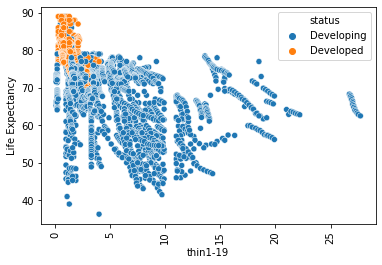

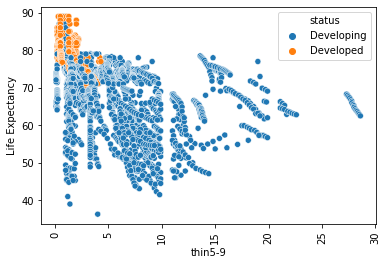

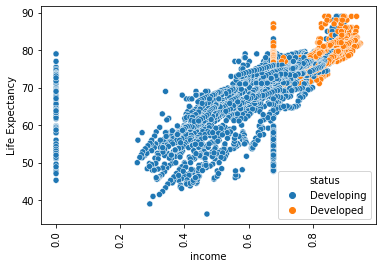

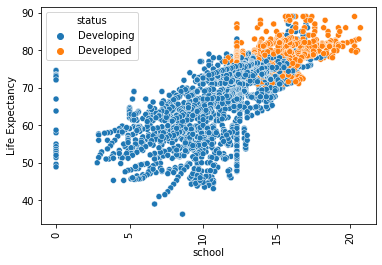

In [26]:
# And scatterplot of all columns of developing vs developed countries
# Make sure to use different colours to indicate the statuses
for col in numerical.columns:
    sns.scatterplot(x = numerical[col], y =  df["life-exp"], hue = categorical.status)  #hue is the color
    plt.xticks(rotation=90)
    plt.ylabel("Life Expectancy")
    plt.xlabel(col)
    plt.show()

### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy

<AxesSubplot:>

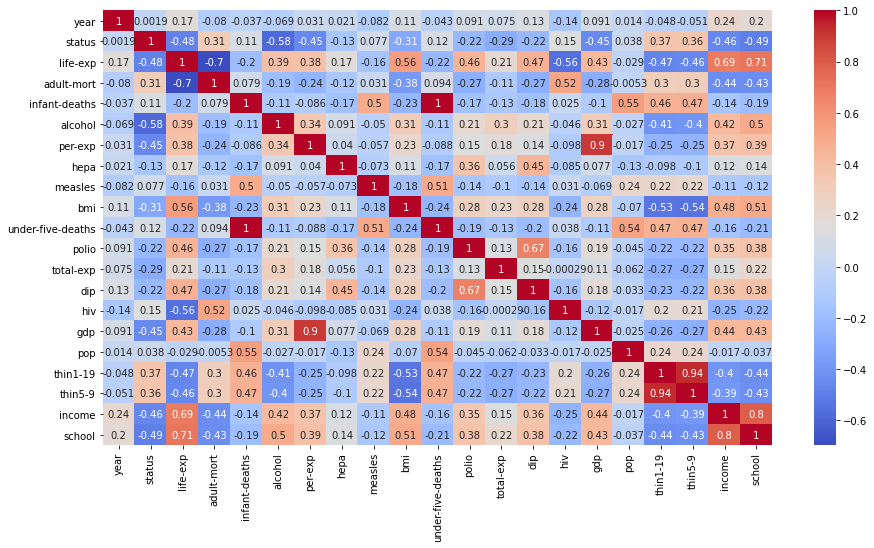

In [27]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, pps actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via ppscore.CV_ITERATIONS)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (ppscore.RANDOM_SEED). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

<AxesSubplot:xlabel='x', ylabel='y'>

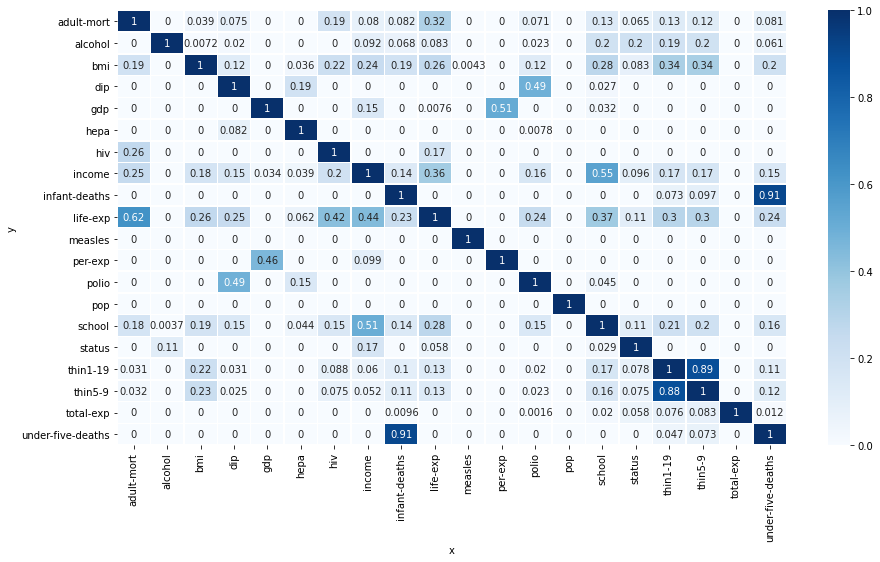

In [28]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# Let's check out heatmap
# sns.heatmap(pps.matrix(dfcopy), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

### Dropping irrelevant features

Based on the two methods, it seems very sure that population has very little to no relevance.  So let's remove it.  As for other variables, it is up to you to try removing them one by one.

For now, let's only remove population.

In [29]:
df.drop(['pop'], axis='columns', inplace=True)

## 4. Modeling

Phew....do you feel tired!  Indeed, 80% of the time, data scientists' job is to inspect and clean data!

### Now, let's set our X and y

In [30]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [31]:
#we gonna drop more columns
X = df.drop(['country', 'year', 'life-exp'], axis = 'columns')

#y is simply the life expectancy col
y = df["life-exp"]

### Train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#why do we want to scale our data before data analysis / machine learning

#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image)

In [34]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2056, 18)
Shape of X_test:  (882, 18)
Shape of y_train:  (2056,)
Shape of y_test:  (882,)


### Training

Let's define some algorithms and compare them using cross-validation.

In [35]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....(note that you can also do nested cv here...but I am too lazy)

In [36]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-14.83884034 -16.6734911  -16.29758452 -16.83598758 -17.93200914]; Mean: -16.515582536672976
SVR - Score: [-12.92453823 -15.26799879 -15.64795957 -15.9899924  -19.22418464]; Mean: -15.81093472734143
KNeighbors Regressor - Score: [-12.12106214 -10.8781674  -10.55740925 -10.42545888  -8.30759708]; Mean: -10.457938947865733
Decision-Tree Regressor - Score: [ -7.82813107 -10.70104623 -12.60829684  -7.97418491  -9.08381995]; Mean: -9.63909579996693
Random-Forest Regressor - Score: [-4.76683211 -4.37826995 -4.76204745 -4.73498887 -3.3899793 ]; Mean: -4.406423535710912


Hmm...it seems random forest do very well....how about we grid search further to find the best version of the model.

### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [38]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 15}

In [39]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [40]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-4.879684165492117

### Feature Importance

Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.  There are several ways: algorithm, permutation, and shap.  Note that these techniques can be mostly applied to most algorithms. 

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [41]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.00478581, 0.22573116, 0.04464167, 0.01454687, 0.00711196,
       0.00432993, 0.00643156, 0.04067952, 0.0677698 , 0.00826084,
       0.0117891 , 0.04461634, 0.18066895, 0.01275318, 0.02942851,
       0.04075279, 0.17935134, 0.07635066])

<BarContainer object of 18 artists>

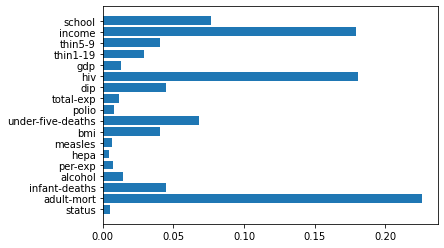

In [42]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

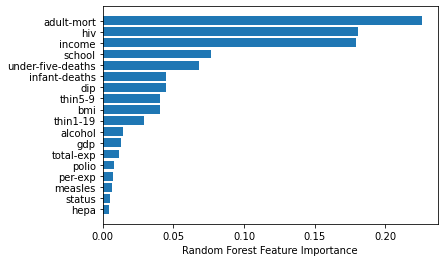

In [43]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

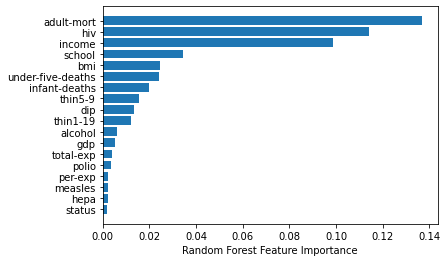

In [44]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [45]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

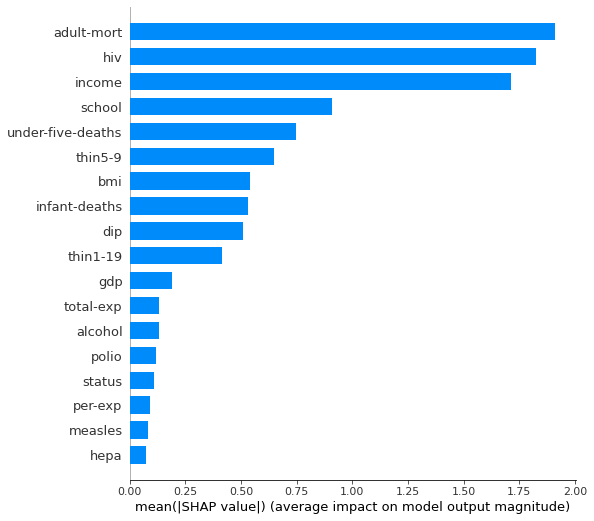

In [46]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

### Inference

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [47]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

3.7250930713025956

### Save model for deployment

To deploy to web or mobile, we have to save the model.

In [48]:
import pickle

# save the model to disk
filename = 'model/life-expectancy.model'
pickle.dump(grid, open(filename, 'wb'))

### Loading model

To load the model in the web or mobile, it can be done very simply:

In [49]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
yhat = loaded_model.predict(X_test)
mean_squared_error(y_test, yhat)

3.7250930713025956